In [45]:
import pandas as pd 

In [46]:
data = pd.read_csv("modulos/data/customer_dataset.csv", sep=",")

In [47]:
data

,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionAmount,transactionFailed,fraudulent,emailDomain,emailProvider,customerIPAddressSimplified,sameCity
0,18.0,pending,True,card,JCB 16 digit,Citizens First Banks,18,False,False,com,yahoo,only_letters,yes
1,26.0,fulfilled,True,bitcoin,VISA 16 digit,Solace Banks,26,False,True,com,yahoo,only_letters,no
2,45.0,fulfilled,False,card,VISA 16 digit,Vertex Bancorp,45,False,False,com,yahoo,digits_and_letters,no
3,23.0,fulfilled,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,23,False,False,com,yahoo,digits_and_letters,no
4,43.0,fulfilled,False,card,Mastercard,Vertex Bancorp,43,True,True,com,other,only_letters,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,NaN,NaN,NaN,NaN,NaN,NaN,25,True,NaN,weird,weird,only_letters,unknown
619,NaN,NaN,NaN,NaN,NaN,NaN,25,True,NaN,weird,weird,only_letters,unknown
620,NaN,NaN,NaN,NaN,NaN,NaN,25,False,NaN,weird,weird,only_letters,unknown
621,NaN,NaN,NaN,NaN,NaN,NaN,19,False,NaN,weird,weird,only_letters,unknown


### 2) Estado de salud del dataframe 

In [48]:
from funpymodeling import status

status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,orderState,145,0.232745,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.451043,302,0.484751,2,object
3,paymentMethodType,281,0.451043,0,0.000000,4,object
4,paymentMethodProvider,281,0.451043,0,0.000000,10,object
5,paymentMethodIssuer,281,0.451043,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,67,int64
7,transactionFailed,0,0.000000,455,0.730337,2,bool
8,fraudulent,455,0.730337,107,0.171750,2,object
9,emailDomain,0,0.000000,0,0.000000,6,object


### 3) Variables numericas 

array([[<Axes: title={'center': 'orderAmount'}>,
        <Axes: title={'center': 'transactionAmount'}>]], dtype=object)

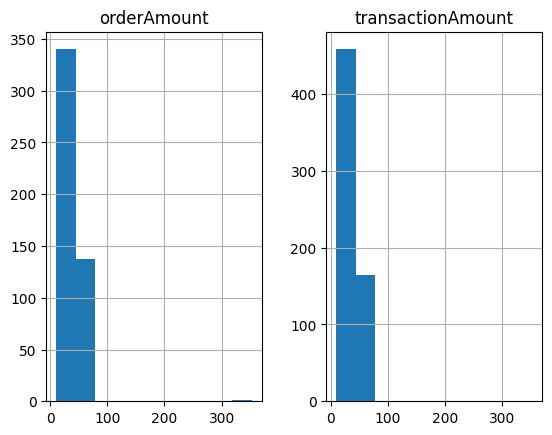

In [49]:
data.hist()

### 4) Variables categoricas

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

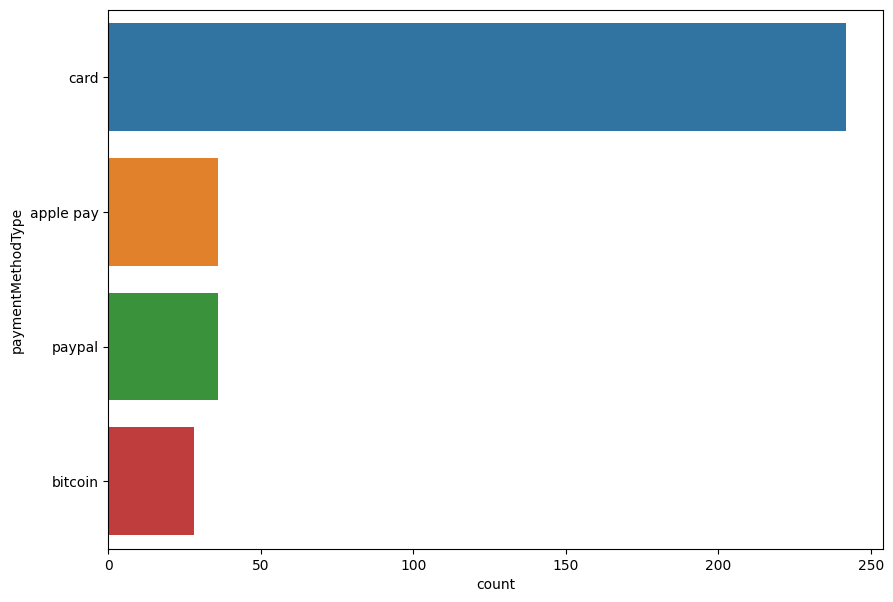

In [51]:
plt.figure(figsize= (10,7))
sns.countplot(y = data['paymentMethodType'], order = data['paymentMethodType'].value_counts().index)
plt.show()

#### Realizo un analisis cuantitativo 

In [52]:
from funpymodeling.exploratory import freq_tbl

In [53]:
freq_tbl(data.paymentMethodType)

,paymentMethodType,frequency,percentage,cumulative_perc
0,card,242,0.388443,0.707602
1,apple pay,36,0.057785,0.812865
2,paypal,36,0.057785,0.918129
3,bitcoin,28,0.044944,1.000000


In [54]:
t_paymentMethodType = freq_tbl(data.paymentMethodType)

t_paymentMethodType.query("frequency<=30")['paymentMethodType']

3    bitcoin
Name: paymentMethodType, dtype: object

# AED 2

### 1) Analizamos las variables categoricas

<Axes: xlabel='count', ylabel='fraudulent'>

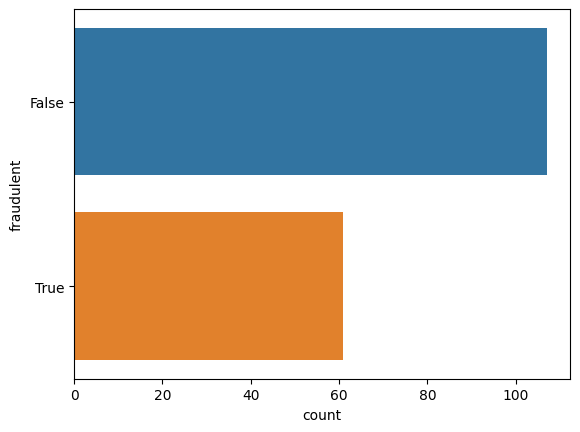

In [55]:
sns.countplot(y= 'fraudulent', data = data)

In [56]:
freq_tbl(data['fraudulent'])

,fraudulent,frequency,percentage,cumulative_perc
0,False,107,0.171750,0.636905
1,True,61,0.097913,1.000000


### 2) Analisis bivariado 

#### 2.1) fraudulent vs. transactionFailed

In [57]:
pd.crosstab(data['fraudulent'], data['transactionFailed'], margins=True) 

transactionFailed,False,True,All
fraudulent,,,
False,73,34,107
True,44,17,61
All,117,51,168


Porcentajes por registro

In [58]:
pd.crosstab(data['fraudulent'], data['transactionFailed'], normalize='index', margins=True)

transactionFailed,False,True
fraudulent,,
False,0.682243,0.317757
True,0.721311,0.278689
All,0.696429,0.303571


#### 2.2) fraudulent vs. transactionAmount

In [59]:
data.groupby('fraudulent')['transactionAmount'].mean().sort_values(ascending=False)

fraudulent
False    33.373832
True     30.950820
Name: transactionAmount, dtype: float64

In [60]:
data.groupby('fraudulent')['transactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
fraudulent,,,,,,,,
False,107.0,33.373832,16.519584,10.0,20.5,33.0,44.5,75.0
True,61.0,30.950820,14.548111,10.0,19.0,29.0,42.0,69.0


#### 2.3) orderAmount vs. transactionAmount

In [61]:
data.groupby('transactionAmount')['orderAmount'].mean().sort_values(ascending = False)

transactionAmount
69    68.000000
10    67.300000
26    52.666667
71    49.666667
53    49.000000
        ...    
52    21.000000
55    18.750000
64    14.000000
62          NaN
63          NaN
Name: orderAmount, Length: 67, dtype: float64

In [62]:
data.groupby('transactionAmount')['orderAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
transactionAmount,,,,,,,,
10,10.0,67.300000,101.923773,15.0,19.00,40.0,55.00,353.0
11,18.0,36.500000,15.324912,11.0,27.50,38.0,45.00,74.0
12,14.0,33.071429,14.095631,11.0,25.25,30.5,44.75,61.0
13,3.0,44.000000,15.394804,27.0,37.50,48.0,52.50,57.0
14,20.0,35.000000,13.146943,11.0,29.00,36.5,43.50,64.0
...,...,...,...,...,...,...,...,...
72,5.0,30.200000,21.924872,14.0,15.00,22.0,33.00,67.0
73,1.0,42.000000,NaN,42.0,42.00,42.0,42.00,42.0
74,4.0,29.250000,13.696107,10.0,24.25,33.5,38.50,40.0


Promedio de todas las variable por 'transactionAmount'

In [63]:
data.groupby('transactionAmount').mean(numeric_only=True)

,orderAmount,transactionFailed
transactionAmount,,
10,67.300000,0.272727
11,36.500000,0.300000
12,33.071429,0.391304
13,44.000000,0.000000
14,35.000000,0.458333
...,...,...
72,30.200000,0.400000
73,42.000000,0.000000
74,29.250000,0.250000


# Graficos

### 3.A) Analisis de transactionAmount y transactionFailed

<Axes: xlabel='transactionFailed', ylabel='transactionAmount'>

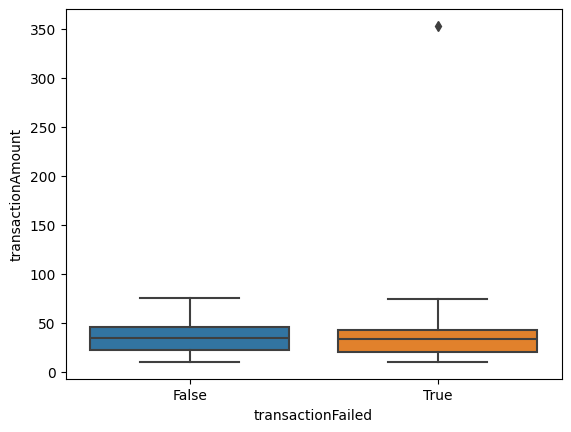

In [64]:
sns.boxplot(y = 'transactionAmount', x = 'transactionFailed', data = data)

<Axes: xlabel='transactionFailed', ylabel='transactionAmount'>

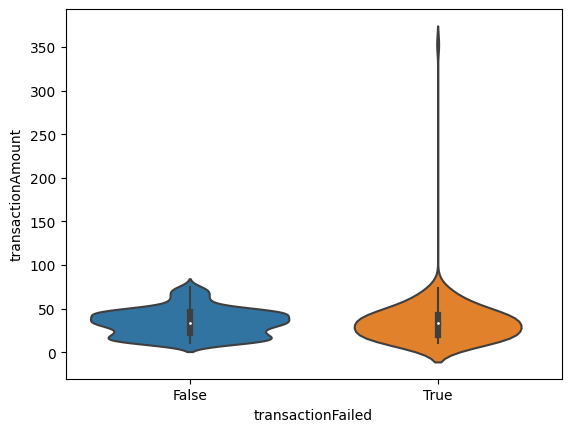

In [65]:
sns.violinplot(y='transactionAmount', x = 'transactionFailed', data = data)

### 3.B) Analisis de paymentMethodType y orderState

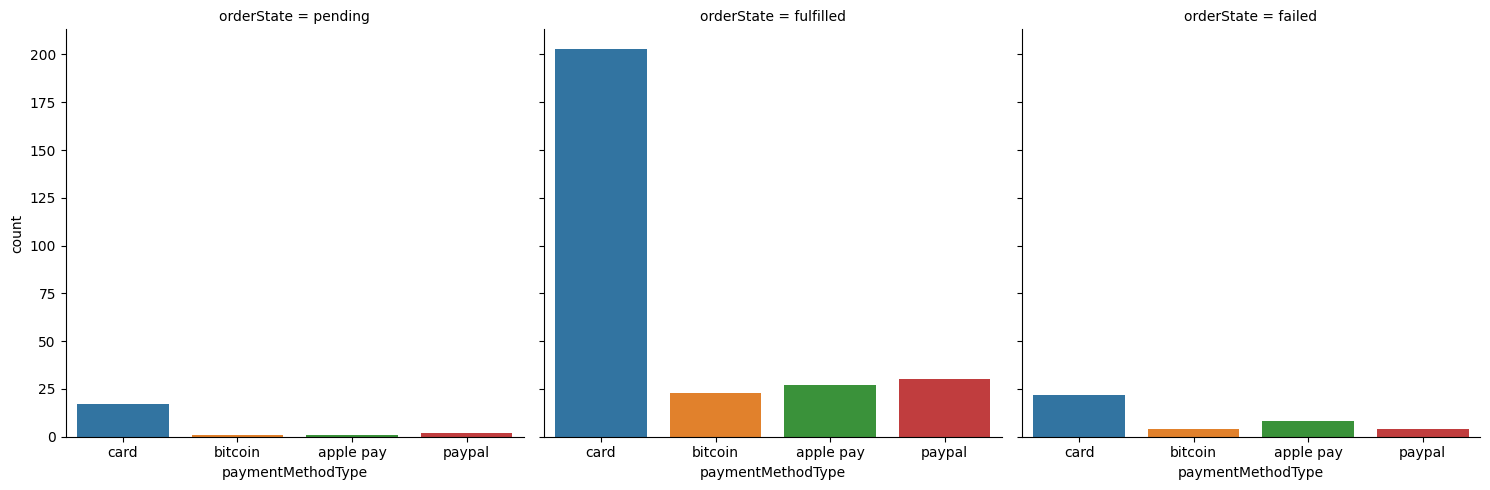

In [66]:
g = sns.catplot(x='paymentMethodType',
                col = 'orderState',
                data = data,
                kind= 'count')

### 3.C) Analisis de orderAmount y transactionAmount

In [67]:
data_aux = data[["orderAmount", "transactionAmount"]].copy()

c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


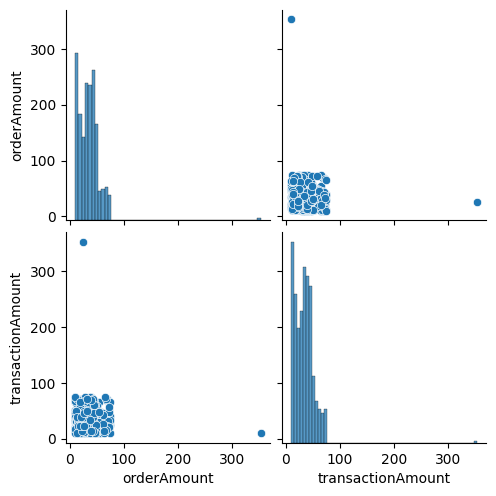

In [68]:
sns.pairplot(data_aux)

# Correlacion

In [69]:
data_test = pd.get_dummies(data)

In [70]:
data_test

,orderAmount,transactionAmount,transactionFailed,orderState_failed,orderState_fulfilled,orderState_pending,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodType_apple pay,paymentMethodType_bitcoin,...,emailProvider_gmail,emailProvider_hotmail,emailProvider_other,emailProvider_weird,emailProvider_yahoo,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_letters,sameCity_no,sameCity_unknown,sameCity_yes
0,18.0,18,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,True,False,False,True
1,26.0,26,False,False,True,False,False,True,False,True,...,False,False,False,False,True,False,True,True,False,False
2,45.0,45,False,False,True,False,True,False,False,False,...,False,False,False,False,True,True,False,True,False,False
3,23.0,23,False,False,True,False,True,False,False,False,...,False,False,False,False,True,True,False,True,False,False
4,43.0,43,True,False,True,False,True,False,False,False,...,False,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,NaN,25,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
619,NaN,25,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
620,NaN,25,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
621,NaN,19,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [71]:
status(data_test)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,transactionAmount,0,0.000000,0,0.000000,67,int64
2,transactionFailed,0,0.000000,455,0.730337,2,bool
3,orderState_failed,0,0.000000,573,0.919743,2,bool
4,orderState_fulfilled,0,0.000000,223,0.357945,2,bool
5,orderState_pending,0,0.000000,595,0.955056,2,bool
6,paymentMethodRegistrationFailure_False,0,0.000000,321,0.515249,2,bool
7,paymentMethodRegistrationFailure_True,0,0.000000,583,0.935795,2,bool
8,paymentMethodType_apple pay,0,0.000000,587,0.942215,2,bool
9,paymentMethodType_bitcoin,0,0.000000,595,0.955056,2,bool


In [72]:
data2 = pd.get_dummies(data, dummy_na=True)

In [73]:
status(data2)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,transactionAmount,0,0.000000,0,0.000000,67,int64
2,transactionFailed,0,0.000000,455,0.730337,2,bool
3,orderState_failed,0,0.000000,573,0.919743,2,bool
4,orderState_fulfilled,0,0.000000,223,0.357945,2,bool
...,...,...,...,...,...,...,...
65,customerIPAddressSimplified_nan,0,0.000000,623,1.000000,1,bool
66,sameCity_no,0,0.000000,486,0.780096,2,bool
67,sameCity_unknown,0,0.000000,139,0.223114,2,bool
68,sameCity_yes,0,0.000000,621,0.996790,2,bool


Sacamos las categorias con valores unicos

In [74]:
vars_to_drop = status(data2).query("unique==1")['variable']

data3 = data2.drop(vars_to_drop, axis=1)

In [75]:
status(data3)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,transactionAmount,0,0.000000,0,0.000000,67,int64
2,transactionFailed,0,0.000000,455,0.730337,2,bool
3,orderState_failed,0,0.000000,573,0.919743,2,bool
4,orderState_fulfilled,0,0.000000,223,0.357945,2,bool
...,...,...,...,...,...,...,...
61,customerIPAddressSimplified_digits_and_letters,0,0.000000,546,0.876404,2,bool
62,customerIPAddressSimplified_only_letters,0,0.000000,77,0.123596,2,bool
63,sameCity_no,0,0.000000,486,0.780096,2,bool
64,sameCity_unknown,0,0.000000,139,0.223114,2,bool


<Axes: >

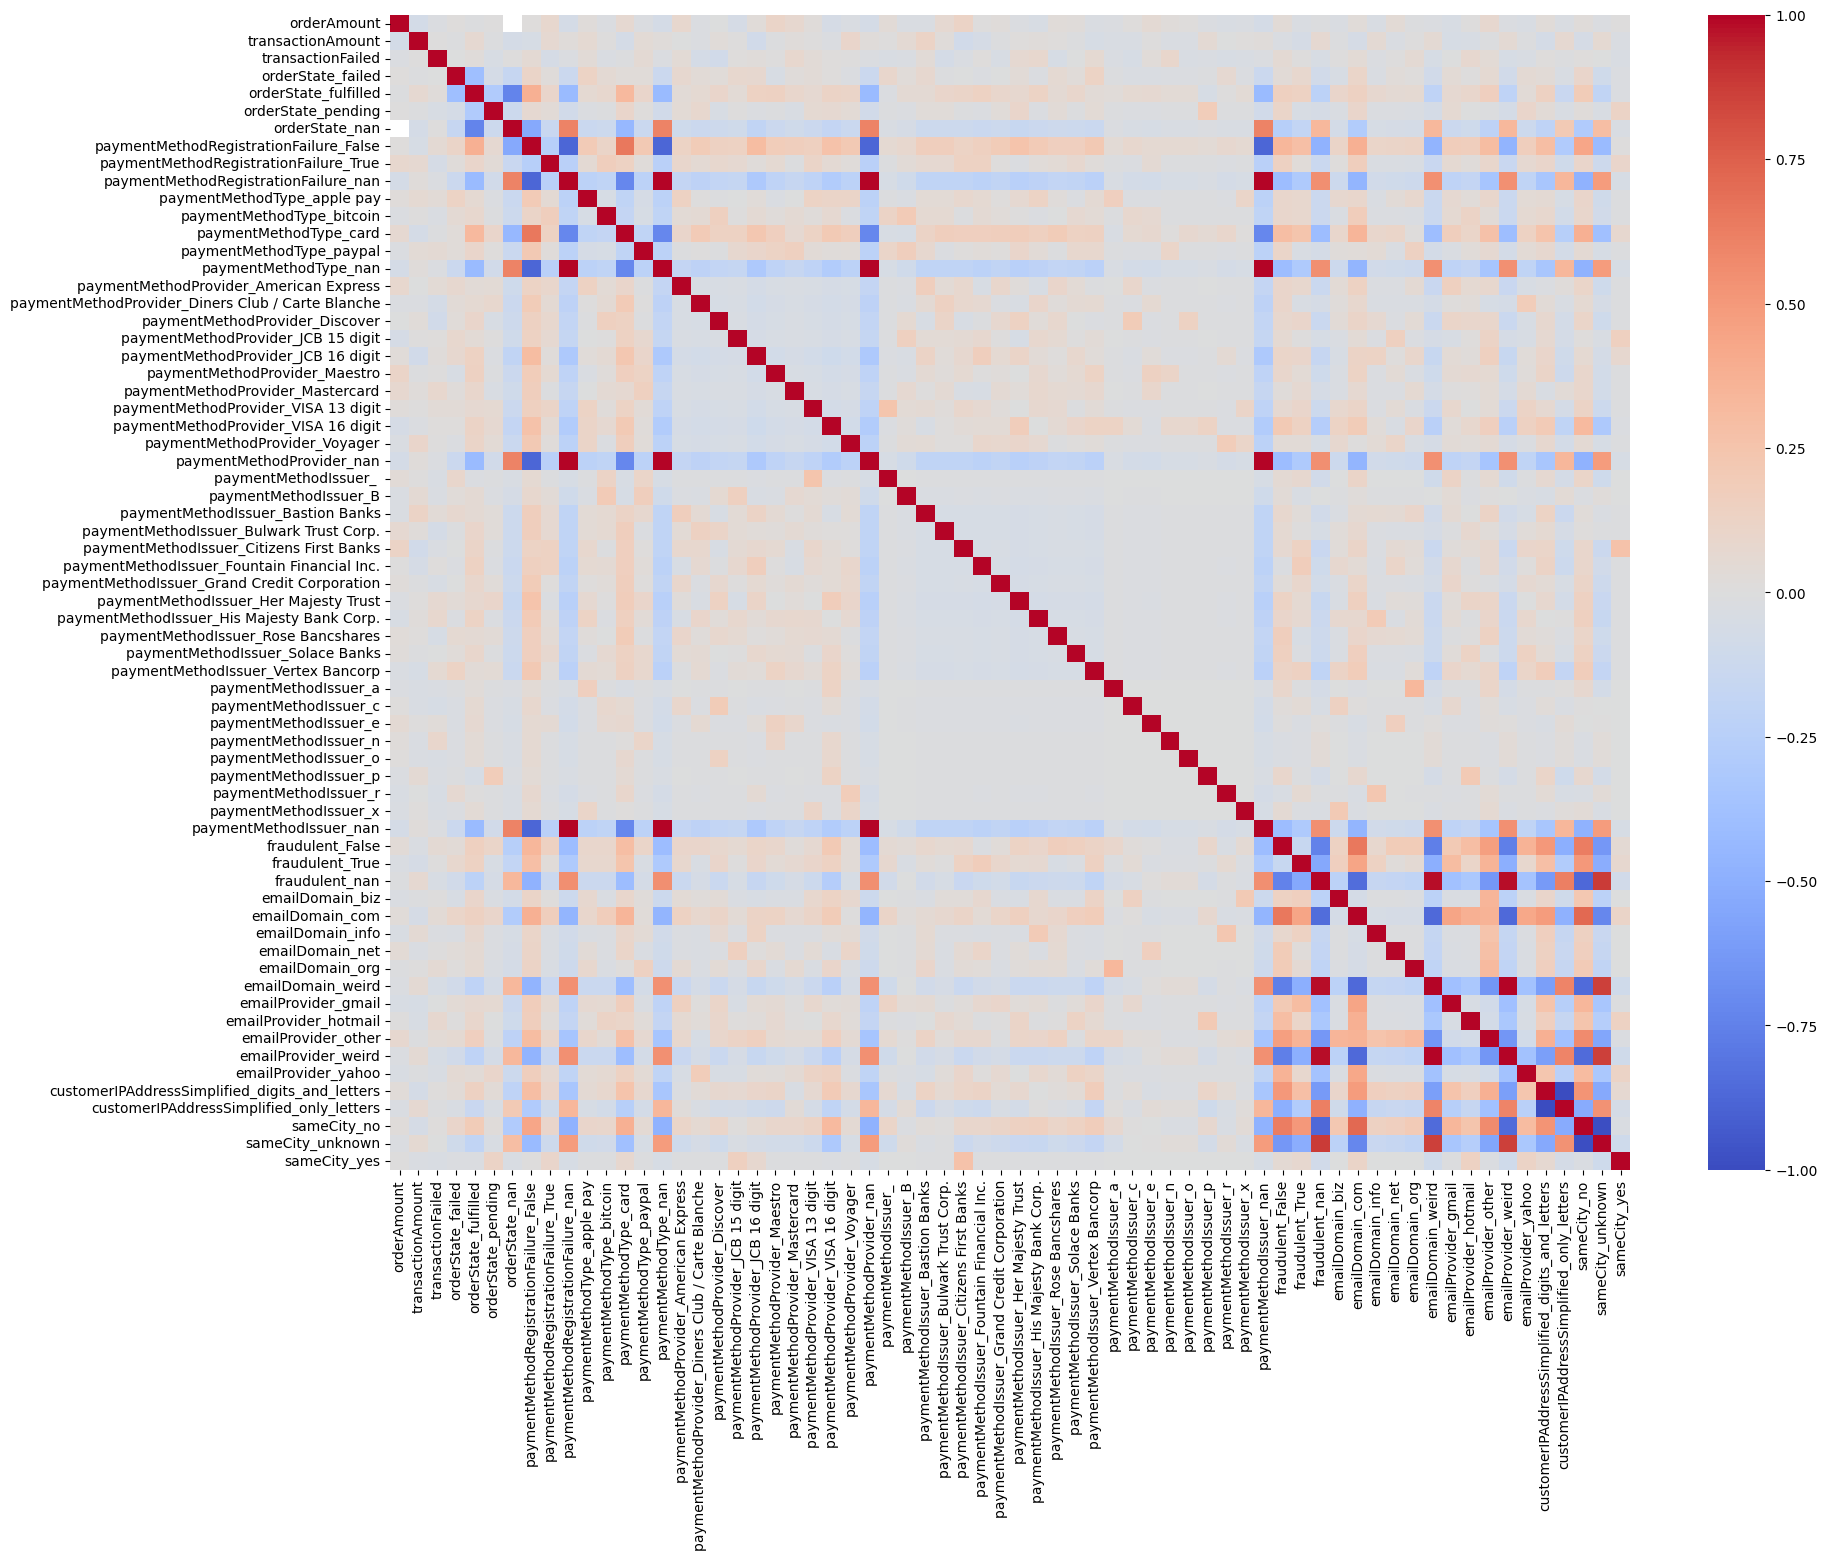

In [76]:
plt.figure(figsize=(20,15))
sns.heatmap(data3.corr(), cmap='coolwarm')

* Cuando el proveedor del correo electrónico es extraño (weird), es muy poco probable que no sea fraude, y genera un warning debido a que es muy probable que la columna fraudulent sea nula. 
* Ocurre lo mismo cuando la direccion IP del cliente solo contiene letras y no incluye digitos. 
* Cuando el dominio del email es "com", es muy probable que no se trate de un fraude. 
* Cuando se desconoce si se registra el pago con el mismo nombre de la ciudad, tambien se gerena un warning debido a que no se sabe es fraudulento o no.
* En la mayoria de casos donde el dominio del correo electronico sea "org", el paymentMethodIssuer es desconocido, lo que tambien genera un warning al evaluar si es fraude o no. 

In [77]:
from pandas_profiling import ProfileReport

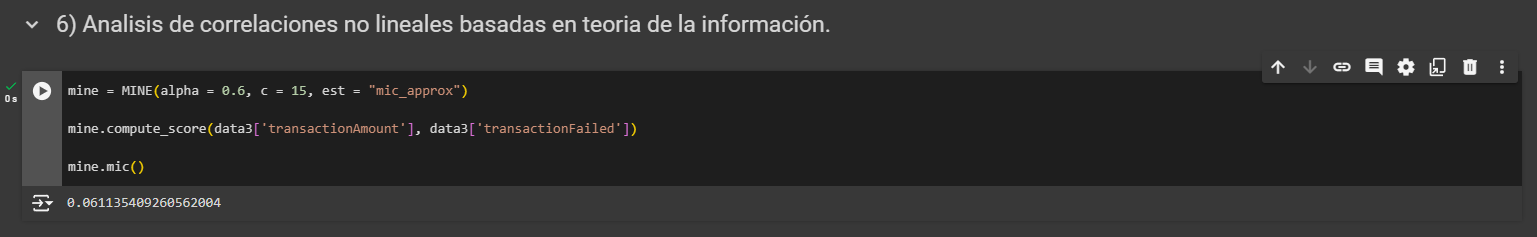